## Analysis my Emails

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [ ]:
df = pd.read_csv('Emails_Dataset.csv', sep=';')
df.sample(20)

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [4]:
df.dtypes

Date       datetime64[ns]
Sender             object
Email              object
Subject            object
dtype: object

#### Create Emails Metrics

##### Who are the senders who send the most emails?

In [ ]:
top_10_senders = df['Sender'].value_counts(sort=True).head(10).to_frame()

##### What were the years that the most email arrived?

In [ ]:
year_values = df.groupby(df['Date'].dt.year, group_keys=False)['Date'].apply(lambda x: x.count()).to_frame()

##### What were the months that the most email arrived?

In [ ]:
month_values = df.groupby(df['Date'].dt.month, group_keys=False)['Date'].apply(lambda x: x.count()).to_frame()
month_values.index = pd.to_datetime(month_values.index, format='%m').strftime('%b') #Tranform month numbers

##### What are the words that appear the most in emails?

In [8]:
# Here,it will be the junction of all the texts of the email to put in the word cloud.
Subject = df['Subject'].str.cat(sep=' ')
# Need to clean encode characters
Subject = Subject.encode('utf-8').replace(b'\xe2\x80\x8a', b'').replace(b'\r\n', b'').decode('utf-8')

### Create the graphs

#### Top 10 Sender (Horizontal bar graph)

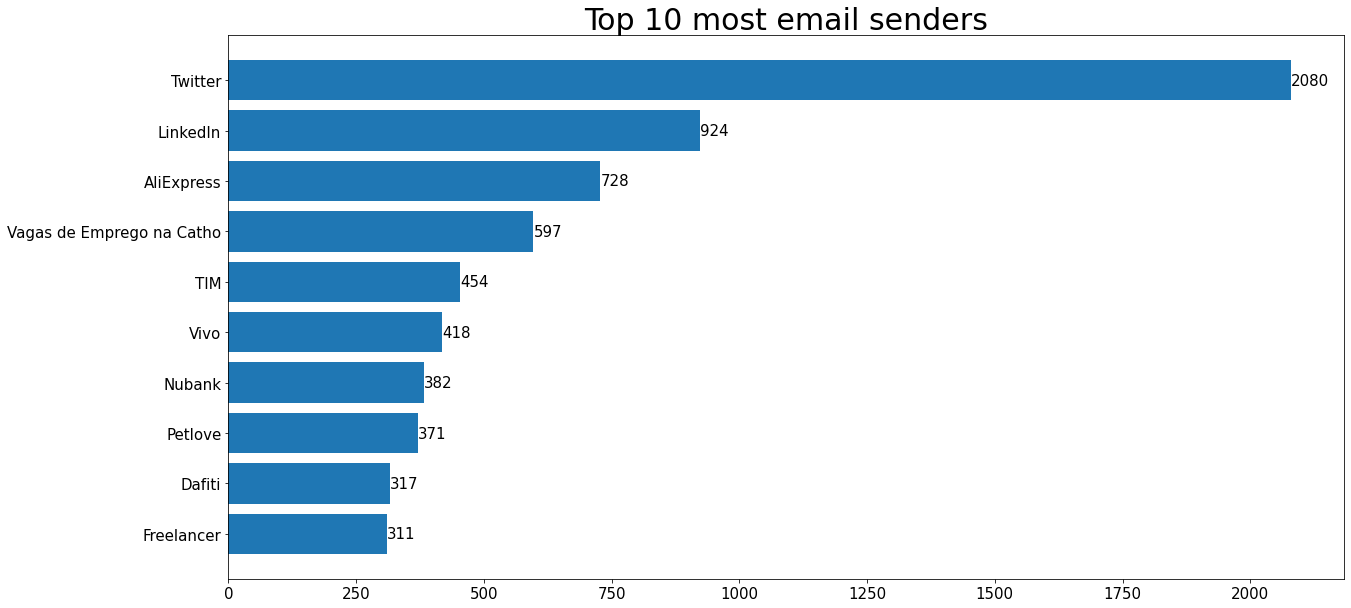

In [86]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(y=top_10_senders.index, width=top_10_senders['Sender'])
ax.invert_yaxis()
ax.set_title(label='Top 10 most email senders', fontsize=30)
ax.tick_params(axis='both', labelsize=15)
ax.bar_label(ax.containers[0], fontsize=15)
plt.show()

#### Emails received for year

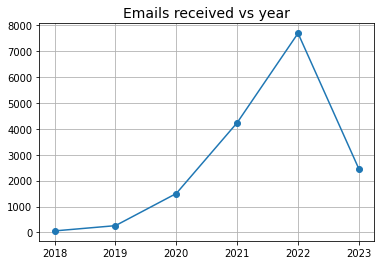

In [87]:
plt.plot(year_values.index, year_values.Date, marker='o')
plt.title('Emails received vs year', fontsize=14)
plt.grid(True)
plt.show()

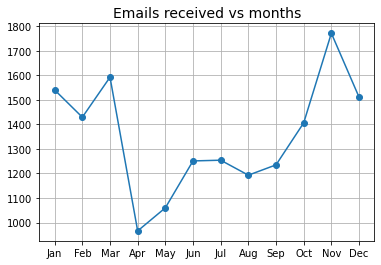

In [92]:
plt.plot(month_values.index, month_values.Date, marker='o')
plt.title('Emails received vs months', fontsize=14)
plt.grid(True)
plt.show()

#### Create the WordCloud

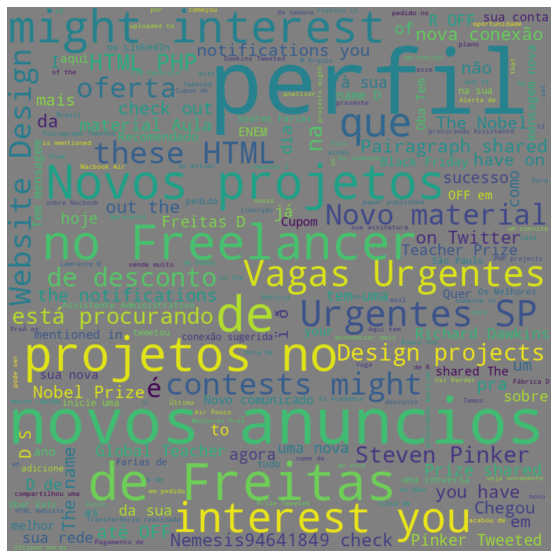

In [106]:
wordcloud = WordCloud(width=800, height=800, background_color="gray", 
                      stopwords=["para", "o","seu","e","você","a","com","and","br","do","for",
                                 "se","Demik","de Freitas","de  Freitas","de   Freitas","de    Freitas"]).generate(Subject)
plt.figure(figsize=(20,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 